# Análisis de Datos Módulo 2

El procesamiento de datos es un paso necesario en el análisis de datos. Y es el proceso por el cuál se convierten o mapean datos de un 'raw' a otro formato para utilizarlo en el análisis. De igual forma se le conoce como limpieza de datos. 

Deniciones relvantes:
* Valor perdido: ocurre cuando alguna entrada de datos yace vacía. 
* Estandarización: ajustar los valores medidos en diferentes escalas respecto a una escala común.
* Normalización: es una forma de hacer que todos los datos estén dentro del mismo rango de valores, para una mejor comparación.
* Agrupamiento: crea categorías más grandes de un conjunto de valores numéricos. 

En Python, usualmente se aplican operaciones a lo largo de las columnas; cada fila de cada columna representa una muestra, por ejemplo una base de datos de automóviles usados. Se puede acceder a cada columna al especificar el nombre de dicha columna, por ejemplo:



```
df['x'] = df['x'] + 1 # se añade una unidad a cada valor a lo largo de la columna x
```

# Datos faltantes

Cuando no se almacena ningún valor de datos para un conjunto se dice que el conjunto presenta un valor faltante. Usualmente, los valores faltantes en los conjuntos de datos aparecen como: ?, N/A, 0 o sólo una celda en blanco. 

**¿Cómo se lidia con datos faltantes?**

No existe una respuesta directa que aplique para todos los caso, pues dependerá del conjunto de datos y la situación de análisis, pero las opciones más comunes son: 

* Checar si la persona o la organización que recopilaron los datos pueden ir a buscar los datos faltantes. 

* Remover los datos donde yacen los valores faltantes. Cuando se eliminan datos, uno puede eliminar la variable entera o sólamente un solo dato con el valor faltante. Para cuando se tienen pocas observaciones, usualmente eliminar un dato faltante particular es la mejor opción; sin embargo, cuando se remueven datos, se busca que la acción genere el menor impacto posible, pues puede generar ruido dentro del análisis. 

* Reemplazar los datos es una técnica que se prefiere sobre remover los datos, pues no se genera desperidicio de datos importantes para el análisis; sin embargo, se pierde exactitud, ya que la única forma de reemplazar los faltantes es sí se crea un estimado de la información con base en otras variables. 

# Reemplazo de datos

Una técnica muy común para reemplazar los datos faltantes es al hacer uso del valor promedio de la variable de entrada. Entonces, el punto es aproximar los valores faltantes de la columna '$x$' con la media de los datos que conforman dicha columna.

No obstante, ¿Qué pasa si los valores no pueden ser promediados? como con las variables categóricas (ya que no son numéricas). Para estos casos se utiliza la moda de los datos, o el valor que más se repite.

Se puede inferir de acuerdo al arreglo de datos cuáles son los valores faltantes respecto a otras variables de entrada, por ejemplo, si tomamos que los vehículos viejos se deprecian más rápido que los nuevos, entonces en cuánto a los valores faltantes en alguna columna de pérdidas por año, entonces se podría inferir que los vehículos más viejos tenderían a perder más valor que los nuevos. 

Finalmente, en varios casos, es más recomandable dejar los datos faltantes como datos faltantes, incluso sí muchas de las características del análisis serán generadas por un gran ruido, uno puede asegurar que dados los datos originales siempre va a percibir lo más cercano a la realidad. 

# Librería de Pandas

Para remover datos que contienen valores faltante, la librería de Pandas posee un método llamado *dropna*. Esencialmente, con el método dropna, uno puede seleccionar que filas o columnas eliminar que contengan valores faltantes como: NaN (Not a Number).

Dentro de *dropna()* se especifica *axis = 0* para eliminar filas, o *axis = 1* para eliminar columnas que contengan estos valores. Por ejemplo:



```
# df.dropna(subset = ['x'], axis = 0, inplace = True)
```

Inplace =  True, sólo escribe el resultado de vuelta al dataframe. Y se puede omitir el True porque está por default en la documentación del método. 

Para reemplazar datos se utiliza el método *replace(dato perdido, nuevo valor)*:



```
media = df['x'].mean()
df['x'].replace(np.nan,mean)
```

También podemos cambiar los datos de entrada por unos datos que contengan menos datos faltantes. 

# Formato de datos

Los datos usualmente son recolectados de diferentes lugares, por grupos de personas diferentes, la cuál puede ser guardada en diferentes formatos. El formato de datos significa traer los datos a una expresión común estándar, que le permite a los usuarios generar comparaciones significativas. Busca que los datos sean consistentes y entendibles. 

Un ejemplo, refiriendo al conjunto de datos de los automóviles usados, existe la columna del consumo de combustible del automóvil medido en millas por unidad de galón. Para alguien que vive en alguna otra ciudad que use el sistema métrico de unidades, se debe de adecuar la cantidad por medio de una conversión de unidades a $\frac{l}{100 km}$ la versión métrica. 

Para transformar de mpg a L/100km tenemos que dividir entre 235 cada valor en la columna de ciudad-mpg. Esto se puede hace en una línea de código.



```
df['city-mpg'] = 235/df['city-mgp']
df.rename(columns=['city-L/100km'],inplace=True)
```

En algunas situaciones cuando se importa un conjunto de datos a Python, el tipo de datos puede estar mal establecido, por ejemplo, en muchas ocaciones una columna podría aparentar tener datos numéricos tipo entero o flotantes; sin embargo, muchas veces la característica es de tipo 'objeto'. Por lo que es de suma importancia convertir este tipo de datos, de lo contrario los modelos tendrán mucho sezgo a la hora de ser implementados. 

En pandas existen muchos tipos de datos, las letras y palabras pueden ser de tipo objeto, int64 son los enteros, flotantes son números reales. Para poder distinguir estos tipos de datos, se utiliza el comando **dataframe.dtypes()**. Para convertir los datos a otro tipo de formato se usa el método **astype('')**

#Normalización de datos

La finalidad de normalizar las variables dentro de un dataframe es porque muchas de las variables son inconsistentes entre sí, la normalización es colocarlas dentro de una rango aceptable para hacer un análisis estadístico más consistente lo que provoca una comparación más acorde entre cada columna. Por ejemplo:

In [2]:
import pandas as pd
matrix = {'Age':[20,30,40],
          'Income':[100000,20000,500000]}
df = pd.DataFrame(matrix)
df.head()

,Age,Income
0,20,100000
1,30,20000
2,40,500000


La edad tiene un rango de 0 a 100 mientras que el ingreso de 20,000 a 500,000. Estas dos característica que componen al conjunto de datos tienen rangos con valores muy separados entre sí. Si se aplicará una regresión lineal, en el dado caso que uno no normalice los datos, el resultado será mayormente influenciado por los valores más grandes, en este caso, el ingreso. Pero esto no significa que el ingreso sea más importante como variable de predicción. Para eveitar esto, se normaliza el conjunto de datos (normalizar quiere decir ponerlos entre su norma o valores entre 0 y 1).

Existen varias formas de normalizar los datos: el primero es el 'SFS' o simple feature scaling en inglés:

$x_{new} = \frac{x_{old}}{x_{max}}$

Simplemente divide cada valor entre su valor máximo, esto crea valores entre 0 y 1. 

Otro método es el 'Min-Max' que toma el valor predecesor, le resta el valor mínimo y lo divide entre la diferencia de el valor máximo y el mínimo. Se le denota mediante una delta Δ:

$x_{new} = \frac{x_{old}-x_{min}}{x_{max}-x_{min}}$

Nuevamente, los valores resultantes están entre 0 y 1.

El método **standard score** utiliza la diferencia entre el predecesor y la media o el promedio de cada columna o variable de entrada, representada mediante μ, y lo divide entre la desviación estándard representada mediante σ

$x_{new} = \frac{x_{old}-μ}{\sigma}$

Los valores resultante yacen alrededor de 0, y típicamente se encuentran dentro de un rango de -3 y +3, pero puede ser más alto o más bajo. Para nuestro ejemplo:


In [3]:
ndf = df.copy()
ndf['Age'] = ndf['Age']/ndf['Age'].max()
ndf.head()

,Age,Income
0,0.50,100000
1,0.75,20000
2,1.00,500000


Utilizando el método de pandas .max() se puede lograr en una sola línea de código. Podemos usar la técnica min max para la columna de ingreso.

In [4]:
ndf['Income'] = (ndf['Income']-ndf['Income'].min())/(ndf['Income'].max()-ndf['Income'].min())
ndf.head()

,Age,Income
0,0.50,0.166667
1,0.75,0.000000
2,1.00,1.000000


Vamos a añadir otra columna para aplicar el método de standard scaling, la llamaremos precios o en inglés: Price.

In [5]:
ndf['Price'] = [45500.04,5000.15,24.3449]
ndf.head()

,Age,Income,Price
0,0.50,0.166667,45500.0400
1,0.75,0.000000,5000.1500
2,1.00,1.000000,24.3449


In [6]:
ndf['Price']=(ndf['Price']-ndf['Price'].mean())/ndf['Price'].std()
ndf.head()

,Age,Income,Price
0,0.50,0.166667,1.148942
1,0.75,0.000000,-0.474729
2,1.00,1.000000,-0.674213


# Agrupación

'Binning', en inglés es cuando se agrupan valores en conjunto en contenedores, por ejemplo se puede agrupar (categorizar) la columna de edad en: [0 a 5], [6 a 10], [11 a 15] años y así sucesivamente. En muchas ocaciones agrupar puede aumentar la precisión de los modelos predictivos. Tmabién se utiliza binning para agrupar un conjunto de valores numéricos en pequeños grupos o categorías para entender mejor la distribución de los datos. Por ejemplo la columna precio tiene un atributo cuyo rango es entre 5,000 y 45,500 usando binning podemos categorizar en tres grupos de: precios bajos, precios medios y precios altos. Un ejemplo más extenso:

In [7]:
prices = {'Price':[13495,16500,18920,41315,45500,5000,5151,6269,7321,33310,12012]}
dfp = pd.DataFrame(prices)
dfp.head(11)

,Price
0,13495
1,16500
2,18920
3,41315
4,45500
5,5000
6,5151
7,6269
8,7321
9,33310


Queremos tres grupos de mismo tamaño de categoría, entonces necesitamos 4 números como divisores que tienen la misma distancia de separación entre ellos. Así que usaremos la función de numpy linspace 

In [8]:
import numpy as np

In [9]:
binss = np.linspace(min(dfp['Price']),max(dfp['Price']),4) #crea un vector cuyo largo existe entre el mínimo valor
# dentro del dataframe al máximo valor del dataframe y lo divide entre el número de particiones.
print(binss)

[ 5000. 18500. 32000. 45500.]


In [10]:
group_names = ['Bajo','Medio','Alto']

In [11]:
dfp['Price-Binned'] = pd.cut(dfp['Price'],binss,labels=group_names,include_lowest=True)

Se utiliza la función cut de pandas para poder hacer la segmentación y ahora la podemos visualizar por medio de un histograma:

(array([7., 0., 1., 0., 3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

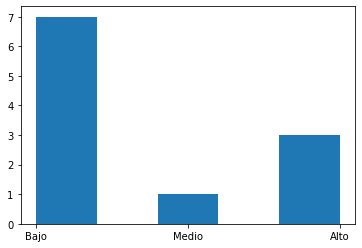

In [12]:
import matplotlib.pyplot as plt
from matplotlib import colors
plt.hist(dfp['Price-Binned'], bins='auto')

# Variables Categóricas

Los modelos estadísticos no pueden tomar objetos o variables tipo string para poder entrenar un modelo, sólo pueden utilizar números. En el conjunto de datos de los vehículos, la variable de entrada 'fuel type' es de tipo categórico (separada por categorías), y tiene dos valores: gas o diesel que está en formato string. Para analizar dichas variables hay que convertirlas en variables numéricas. Se codifican los valores para cada nueva celda con elementos únicos al original. Por ejemplo:

In [15]:
Petrol = {'Brand':['Ford','Nissan','Audi','Mercedes'],'Fuel':['diesel','gas','gas','diesel']}
dfF = pd.DataFrame(Petrol)
dfF.head()

,Brand,Fuel
0,Ford,diesel
1,Nissan,gas
2,Audi,gas
3,Mercedes,diesel


Se utilizan las variables 'dummies' que realmente son una representación numérica para cada categoría, en este caso al ser dos opciones es una representación binaria, con 1's y 0's, se llama añ método **.get_dummies()** para convertir variables categóricas en (0 o 1)

In [16]:
pd.get_dummies(dfF['Fuel'])

,diesel,gas
0,1,0
1,0,1
2,0,1
3,1,0
